In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from percolation_function import net
from percolation_function import clusterization
from percolation_function import Percolation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Creation and representation of data according to the value of probability

In [2]:
size_net = 300
partitions = 1000
probabilities = np.linspace(0,1,partitions)
is_percolation = np.array([])

In [3]:
for probability in probabilities:
    percolation = Percolation(size_net,probability)
    is_percolation = np.append(is_percolation, percolation.is_percolation()*1)

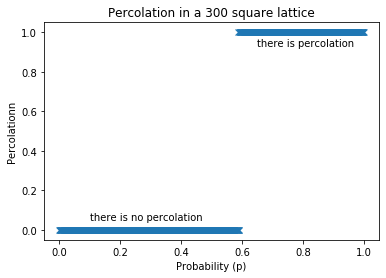

In [4]:
plt.plot(probabilities, is_percolation, 'x')
plt.title("Percolation in a 300 square lattice")
plt.text(0.65, 0.93, 'there is percolation')
plt.text(0.1, 0.05, 'there is no percolation')
plt.xlabel("Probability (p)")
plt.ylabel("Percolationn")
plt.savefig("Percolation_in_a_300_square_lattice.jpg")
plt.show()

### Applying Logistic Regression

In [5]:
X = probabilities
y = is_percolation

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train = X_train.reshape((1,-1))
X_train = X_train.T
X_test = X_test.reshape((1,-1))
X_test = X_test.T
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

/home/sergio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
# Algorithm accuracy
acc_log

99.62

In [9]:
# Accuracy in predicting y_test values
(sum(y_pred_log == y_test)/len(y_test))*100

99.5

### Percolation threshold calculation

In [10]:
X = probabilities
y = is_percolation

In [11]:
X = X.reshape((1,-1))
X= X.T
y = is_percolation
logreg = LogisticRegression()
logreg.fit(X, y)

/home/sergio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
p_c = -logreg.intercept_/logreg.coef_

In [13]:
p_c

array([[0.58493196]])

### Heat maps to represent the lattice

In [14]:
a = net(300,0.65)
b = clusterization(a)

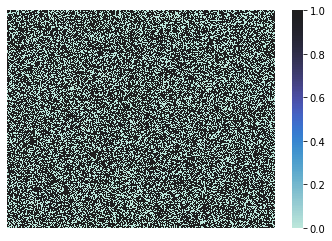

In [15]:
heat_map = sb.heatmap(a[1:-1,1:-1],center=1)
#hide x-axis
heat_map.get_xaxis().set_visible(False)

#hide y-axis 
heat_map.get_yaxis().set_visible(False)
plt.show()

In [16]:
b[b == 0] = -b.max()/2

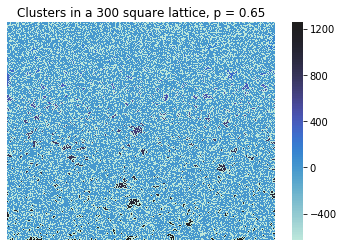

In [17]:
heat_map = sb.heatmap(b[1:-1,1:-1], center =b.max())
plt.title("Clusters in a 300 square lattice, p = 0.65")
#hide x-axis
heat_map.get_xaxis().set_visible(False)

#hide y-axis 
heat_map.get_yaxis().set_visible(False)
plt.savefig("Clusters_in_a_300_square_lattice2.jpg")
plt.show()

1352